# Prepare a model for glass classification using KNN

Data Description:
RI : refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
AI: Aluminum
Si: Silicon
K:Potassium
Ca: Calcium
Ba: Barium
Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

In [1]:
# KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [3]:
glass = pd.read_csv('D:/DS_Assignments/13_KNN/glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [5]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
glass[glass.duplicated()].shape

(1, 10)

In [8]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [9]:
df = glass.drop_duplicates()
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [10]:
corr = df.corr()
corr.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725


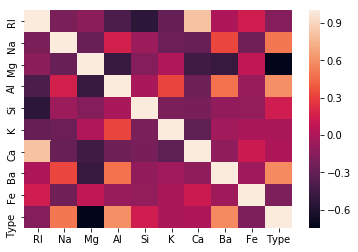

In [11]:
sns.heatmap(corr)

#### #We can notice that Ca and K values don't affect Type that much.

#Also Ca and RI are highly correlated, this means using only RI is enough.

#So we can go ahead and drop Ca, and also K.(performed later)

## Scatter plot of two features, and pairwise plot

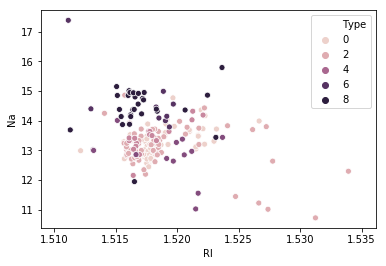

In [12]:
sns.scatterplot(df['RI'],df['Na'],hue=df['Type'])

In [13]:
### # Suppose we consider only RI, and Na values for classification for glass type.

#From the above plot, We first calculate the nearest neighbors from the new data point to be calculated.
#If the majority of nearest neighbors belong to a particular class, say type 4, then we classify the data point as type 4.
#But there are a lot more than two features based on which we can classify. So let us take a look at pairwise plot to capture all the features.

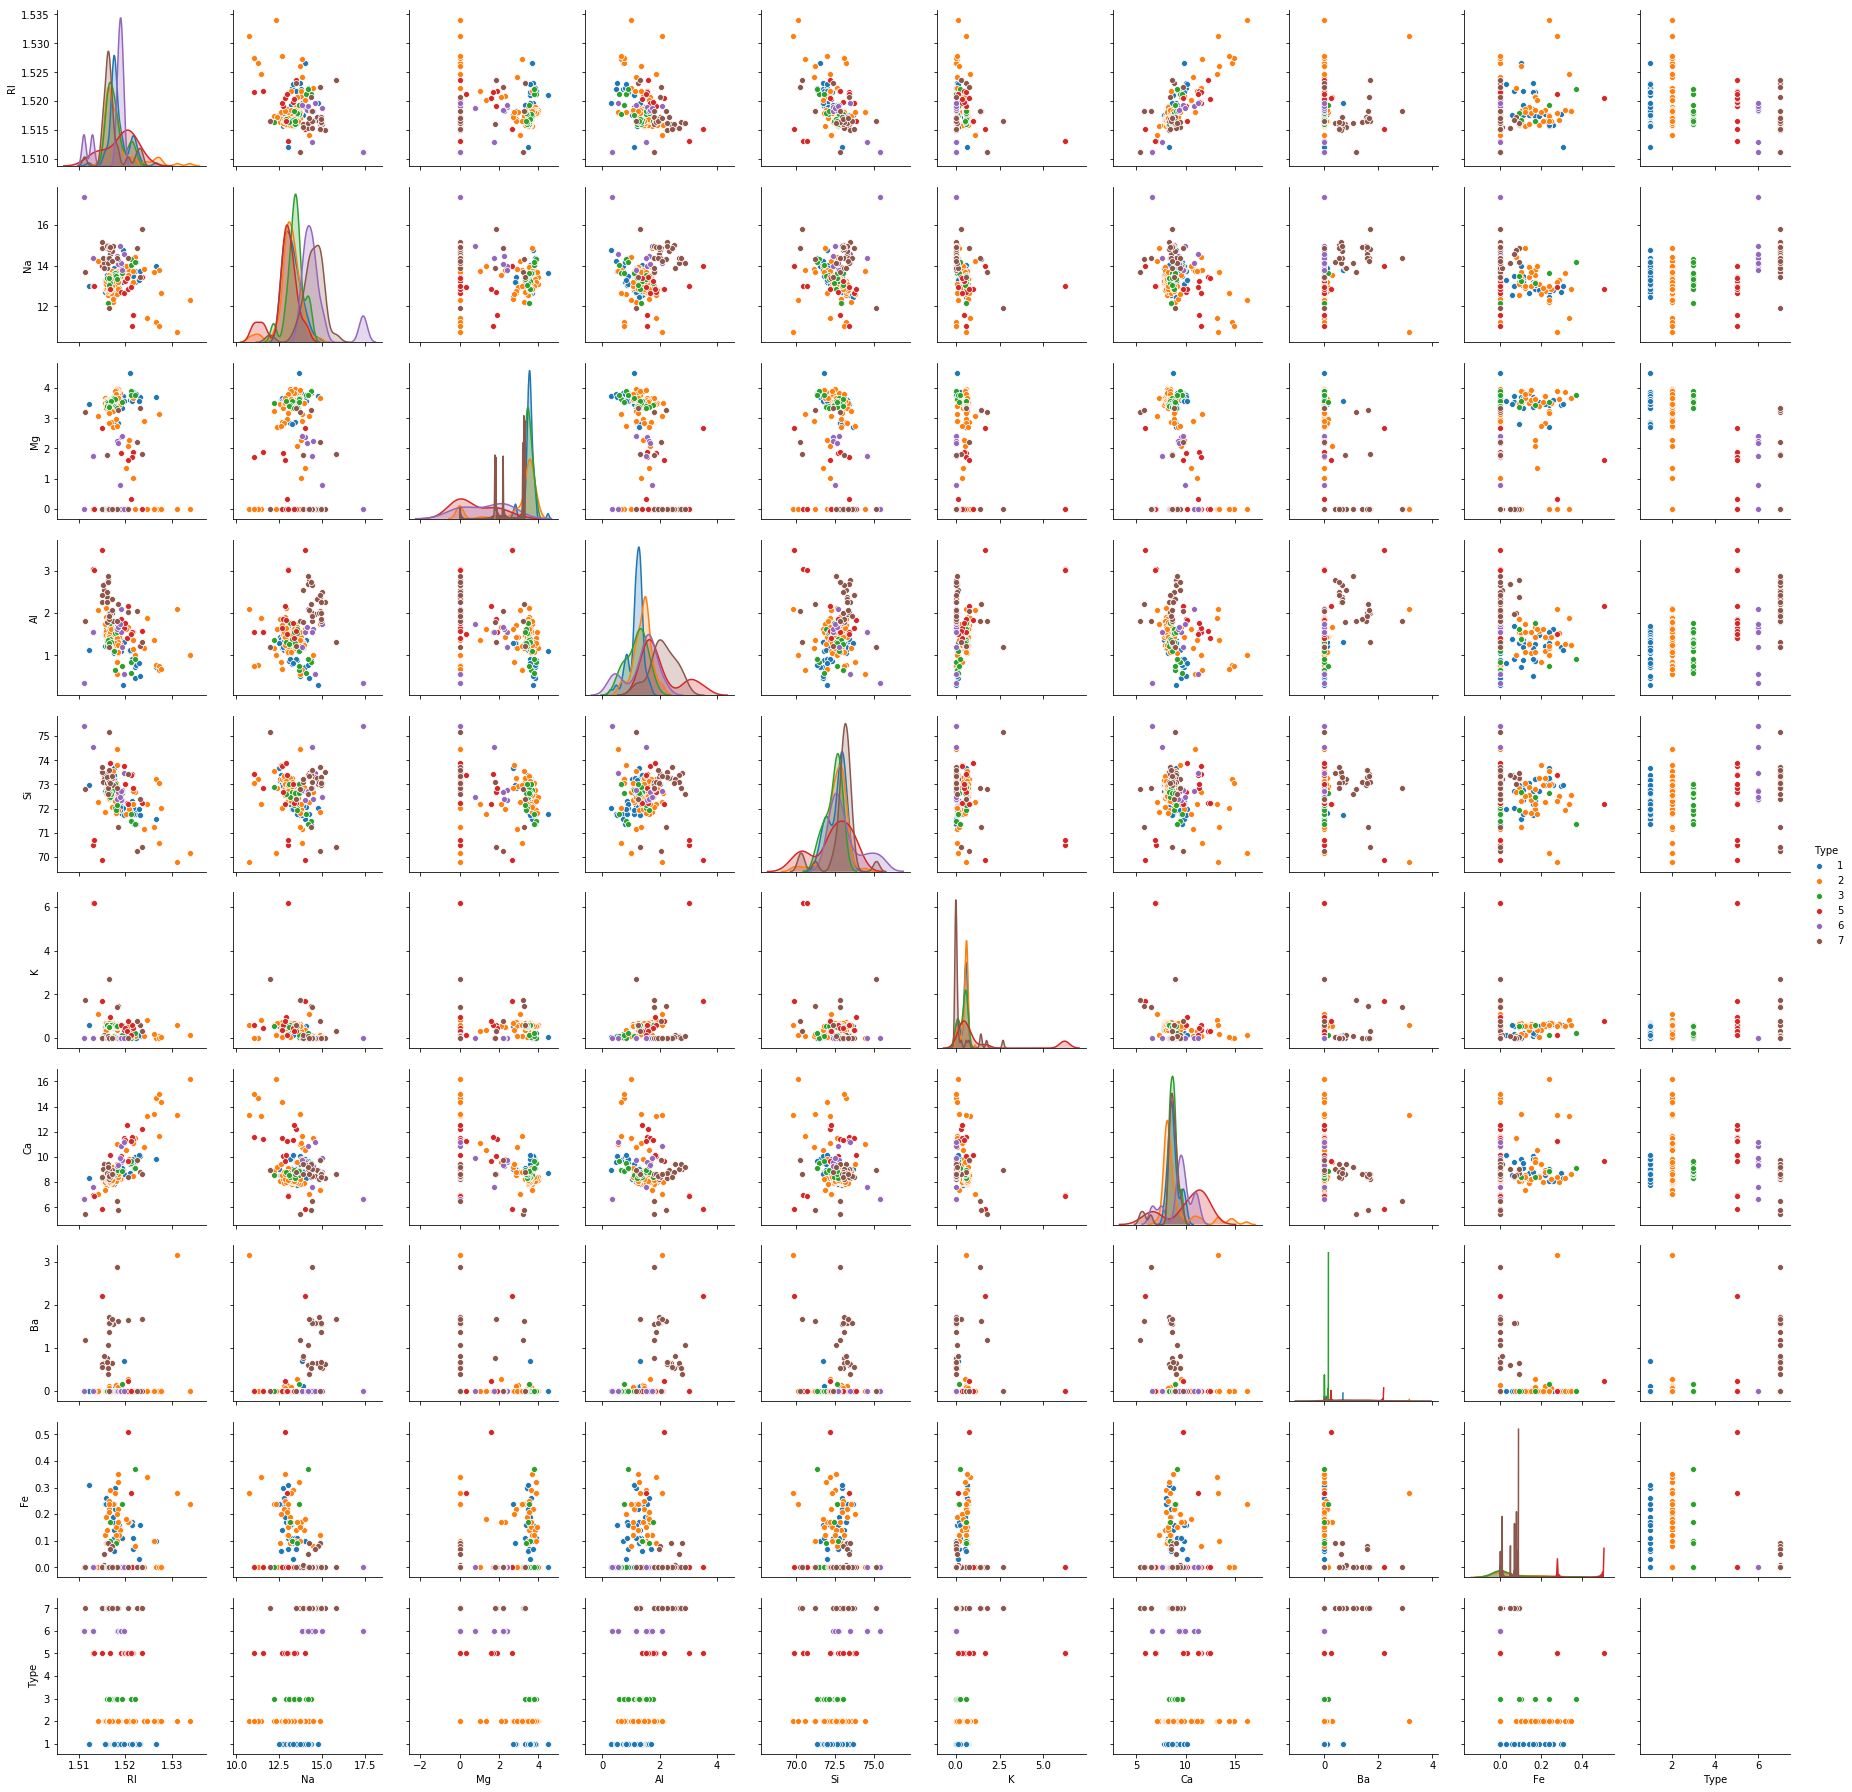

In [14]:
#pairwise plot of all the features
sns.pairplot(df,hue='Type')
plt.show()

In [15]:
##The pairplot shows that the data is not linear and KNN can be applied to get nearest neighbors and classify the glass types
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Feature Scaling

In [16]:
DF= df.iloc[:,0:9]
DF.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [18]:
array= DF.values
array

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [19]:
from sklearn.preprocessing import StandardScaler

In [21]:
# Normalization function
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [23]:
df_knn = pd.DataFrame(X,columns=df.columns[:-1])
df_knn

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
5,-0.789119,-0.753716,0.646254,0.344645,0.407845,0.216568,-0.621487,-0.353808,2.082200
6,-0.303303,-0.127751,0.639311,-0.625523,0.563250,0.124494,-0.551190,-0.353808,-0.588301
7,-0.260340,-0.311858,0.646254,-0.807430,0.757505,0.109149,-0.501982,-0.353808,-0.588301
8,0.275049,0.780510,0.625425,-0.160651,-0.744737,0.093803,-0.459803,-0.353808,-0.588301
9,-0.263645,-0.495966,0.639311,-0.180863,0.433746,0.109149,-0.389506,-0.353808,0.541526


In [25]:
x= df_knn
y= df['Type']
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
5,-0.789119,-0.753716,0.646254,0.344645,0.407845,0.216568,-0.621487,-0.353808,2.082200
6,-0.303303,-0.127751,0.639311,-0.625523,0.563250,0.124494,-0.551190,-0.353808,-0.588301
7,-0.260340,-0.311858,0.646254,-0.807430,0.757505,0.109149,-0.501982,-0.353808,-0.588301
8,0.275049,0.780510,0.625425,-0.160651,-0.744737,0.093803,-0.459803,-0.353808,-0.588301
9,-0.263645,-0.495966,0.639311,-0.180863,0.433746,0.109149,-0.389506,-0.353808,0.541526


In [26]:
y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
184    6
185    7
186    7
187    7
188    7
189    7
190    7
191    7
192    7
193    7
194    7
195    7
196    7
197    7
198    7
199    7
200    7
201    7
202    7
203    7
204    7
205    7
206    7
207    7
208    7
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [27]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3,random_state=45)

In [28]:
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
185,0.010659,1.124177,0.403249,1.557355,-1.819617,1.474913,-2.224265,2.925383,-0.588301
202,-0.584217,1.713320,-1.860172,1.092483,0.589150,-0.765554,-0.473863,3.086325,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
72,-0.673449,-0.078656,0.618482,0.243586,0.278342,0.170531,-0.748022,-0.353808,-0.588301
58,-0.266950,-0.017287,0.680969,-0.524464,0.174739,0.109149,-0.480893,-0.353808,0.541526
29,-0.167804,-0.397775,0.562938,-0.342557,0.265391,0.155186,-0.326239,-0.353808,-0.588301
183,-2.378762,4.879962,-1.860172,-2.242470,3.567734,-0.765554,-1.619708,-0.353808,-0.588301
188,1.752326,2.928427,-0.589601,-0.281922,-2.881547,-0.289839,-0.241882,3.025972,-0.588301
180,0.175903,1.946522,-1.318617,0.587187,-0.200822,-0.765554,0.700101,-0.353808,-0.588301
177,-0.019084,1.296010,-0.304938,0.344645,-0.356226,-0.765554,0.215050,-0.353808,-0.588301


In [29]:
x_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
83,-1.407130,1.038260,0.285217,1.274389,-0.485730,0.922469,-1.317430,-0.353808,-0.588301
62,1.296254,0.940070,0.785114,-1.353149,-1.690113,-0.765554,0.517328,-0.353808,-0.588301
84,-0.693278,-0.054108,0.625425,0.081891,0.084086,-0.074999,-0.523071,-0.353808,-0.588301
137,-0.531339,-0.753716,0.583767,0.182950,0.912909,0.247260,-0.740993,-0.353808,-0.588301
187,1.362351,1.786963,-0.332710,1.233966,-3.101703,0.400716,0.566537,-0.353808,-0.588301
74,-0.808948,-0.471418,0.625425,0.122315,0.602101,0.293297,-0.698814,-0.353808,-0.588301
50,0.301488,-0.250489,0.451850,-0.342557,-0.382127,0.155186,0.130693,-0.353808,0.541526
156,0.945938,0.768237,0.750399,-1.757386,-1.120298,-0.596752,0.489210,-0.353808,-0.588301
206,-0.012475,1.210094,-1.860172,0.748882,0.265391,1.398185,-1.746243,5.440099,-0.588301
91,-0.815558,-0.348680,0.507394,0.263798,0.783406,-0.658134,-0.396536,-0.353808,1.363219


In [30]:
y_train

186    7
203    7
211    7
73     2
59     1
29     1
184    6
189    7
181    6
178    6
90     2
108    2
150    3
174    5
34     1
131    2
187    7
172    5
67     1
105    2
16     1
144    2
117    2
135    2
180    6
103    2
171    5
91     2
136    2
44     1
      ..
57     1
212    7
127    2
111    2
17     1
12     1
24     1
210    7
163    5
141    2
182    6
8      1
47     1
119    2
58     1
54     1
143    2
66     1
15     1
121    2
122    2
69     1
164    5
190    7
96     2
32     1
125    2
132    2
159    3
204    7
Name: Type, Length: 149, dtype: int64

In [31]:
y_test

84     2
63     1
85     2
138    2
188    7
75     2
51     1
157    3
207    7
92     2
162    3
33     1
139    2
3      1
25     1
100    2
41     1
151    3
160    3
13     1
201    7
101    2
196    7
74     2
70     2
148    3
65     1
95     2
130    2
80     2
      ..
149    3
123    2
195    7
38     1
81     2
83     2
133    2
161    3
10     1
118    2
68     1
102    2
0      1
62     1
202    7
77     2
97     2
152    3
35     1
98     2
120    2
129    2
194    7
199    7
46     1
116    2
4      1
28     1
114    2
126    2
Name: Type, Length: 64, dtype: int64

## KNN Model

In [32]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [33]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

1    29
2    23
7     7
3     3
5     2
dtype: int64

In [34]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions


col_0,1,2,3,5,7
Type,,,,,
1,16,2,1,0,0
2,6,19,2,1,0
3,6,2,0,0,0
7,1,0,0,1,7


In [35]:
print("Accuracy", accuracy_score(y_test,preds)*100)

('Accuracy', 65.625)


In [36]:
model.score(x_train,y_train)

0.825503355704698

In [37]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.55      0.84      0.67        19
           2       0.83      0.68      0.75        28
           3       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         0
           7       1.00      0.78      0.88         9

   micro avg       0.66      0.66      0.66        64
   macro avg       0.48      0.46      0.46        64
weighted avg       0.67      0.66      0.65        64



## Grid Search for Algorithm Tuning

In [38]:
n_neighbors = np.array(range(1,15))
param_grid = dict(n_neighbors=n_neighbors)

In [39]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
print(grid.best_score_)
print(grid.best_params_)

0.6619718309859155
{'n_neighbors': 3}


## Visualizing the CV results

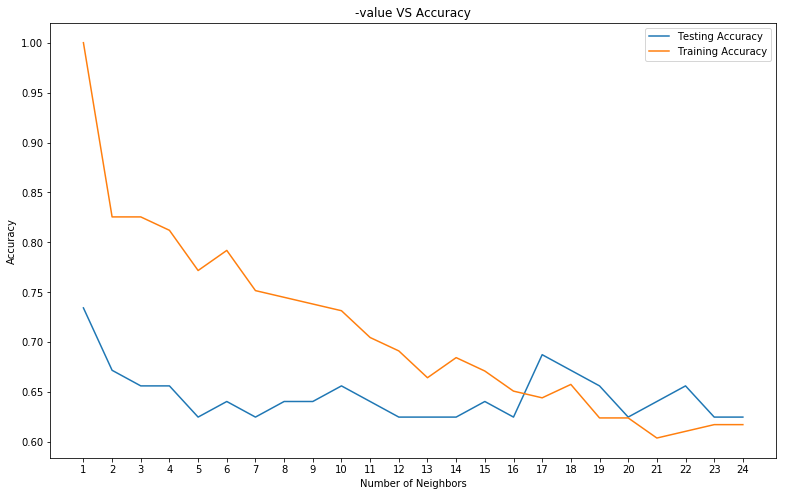

Best accuracy is 0.734375 with K = 1


In [41]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))